How do we go from a .ptx file to Zernike coefficients?

In [2]:
# Set up notebook
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import glob
import numpy as np
import pylab as plt

# Make sure we can find lassi-analysis
import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

# Load lassi-analysis modules
from plotting import barChartPlot, surfacePlot
from lassiAnalysis import processLeicaScan, extractZernikesLeicaScanPair

In [14]:
# Parameters for processing (segmenting and smoothing) the raw PTX data.
n = 512
xOffset = -7; yOffset=52; rot=0.; radius=49.
path = "/home/scratch/psalas/LASSI/1Feb"

/home/scratch/psalas/LASSI/1Feb/2020_01_29_00:19:13.ptx
Processing: /home/scratch/psalas/LASSI/1Feb/2020_01_29_00:19:13.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-7, 52, 49.0, 49.0, 0.0]
Picking 10000 random data points from a total of 12518938
Skipped 0 non-data lines
Skipped 0 non-data lines
Starting with 12518938 lines of data
Filtered out 0 points of 12518938 ( 0.00%) intensity equal to zero
Now we have 12518938 lines of data
neighborFilter reduces 12518938 points to 11675329 points (843609 filtered, 6.738663 %) using tol: 0.122000
Now we have 11675329 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.76, std= 0.13
Elliptical fitler parameters:
[-7, 52, 49.0, 49.0, 0.0]
Filter removed 3243065 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 8432264 lines of data
z - limit filtered out 45013 points below -80.00 and above -10
Rotating about Z by  0.00 degrees
Now we have 8387251 lines of da

/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:367: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:396: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)


RMS on parabola subtracted scan: 0.0 m


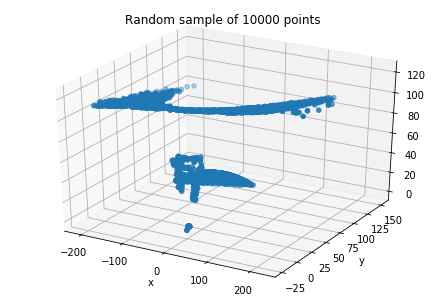

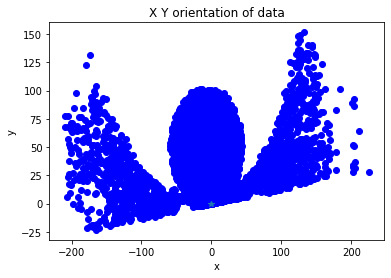

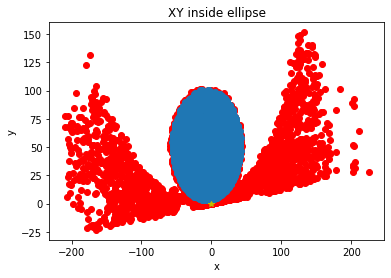

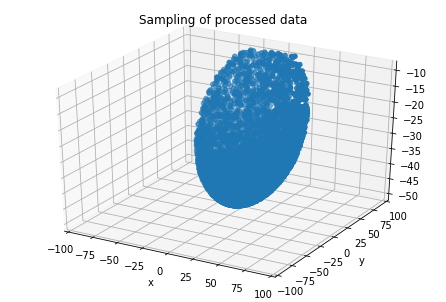

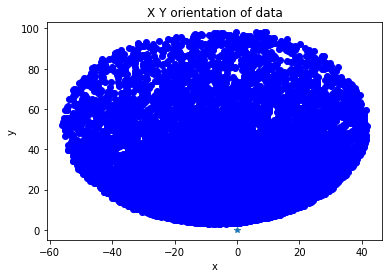

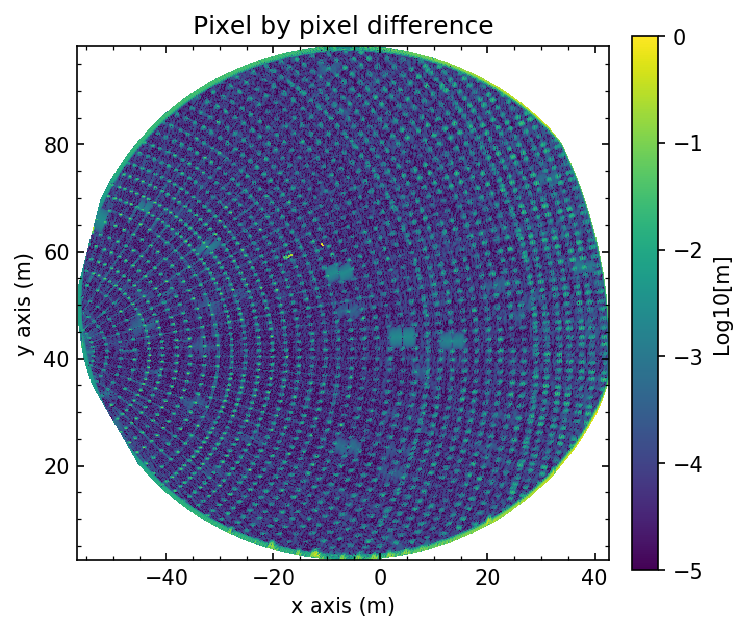

In [16]:
# Only process a pair of scans, reference and signal.
for sn in ['2020_01_29_00:19:13']: #, '2020_01_29_00:06:37']: #['2020_02_12_14:56:00', '2020_02_12_15:06:32']:
    re = '{0}/{1}.ptx'.format(path, sn)
    print(re)
    fns = glob.glob(re)
    for fn in fns:
        print('Processing: {}'.format(fn))
        processLeicaScan(fn, N=n, rot=rot, ellipse=[xOffset, yOffset, radius, radius, 0.])

In [17]:
# Extract Zernike coefficients from the signal minus reference.
# Notice that the input is the output from gpus.smoothGPUs, i.e. the .csv files.
ref_file = '/home/scratch/psalas/LASSI/gpus/output/June2019/2020_01_29_00:06:37.ptx.csv'
sig_file = '/home/scratch/psalas/LASSI/gpus/output/June2019/2020_01_29_00:19:13.ptx.csv'
x, y, diff, fitlist = extractZernikesLeicaScanPair(ref_file, sig_file)

Masking file: /home/scratch/psalas/LASSI/gpus/output/June2019/2020_01_29_00:06:37.ptx.csv


/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:367: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:396: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)


Masking file: /home/scratch/psalas/LASSI/gpus/output/June2019/2020_01_29_00:19:13.ptx.csv


/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:367: RuntimeWarning: invalid value encountered in less
  mask = (((xrr - xc)**2. + (yrr - yc)**2.) < maskRadius**2.)
/home/scratch/psalas/LASSI/lassi-analysis_v2/lassiAnalysis.py:396: RuntimeWarning: invalid value encountered in less
  mask = (((xrrm - xc)**2. + (yrrm - yc)**2.) < maskRadius**2.)


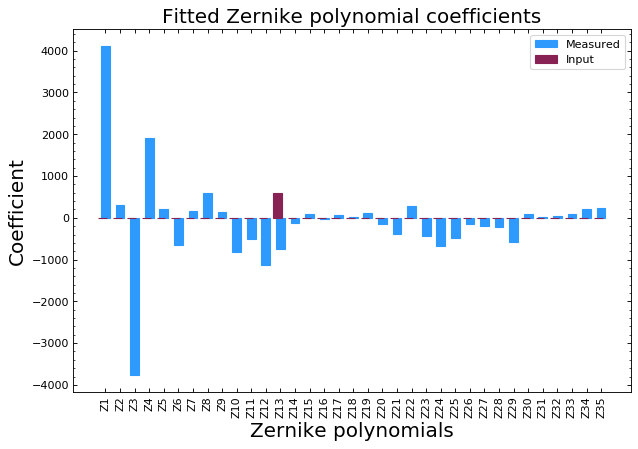

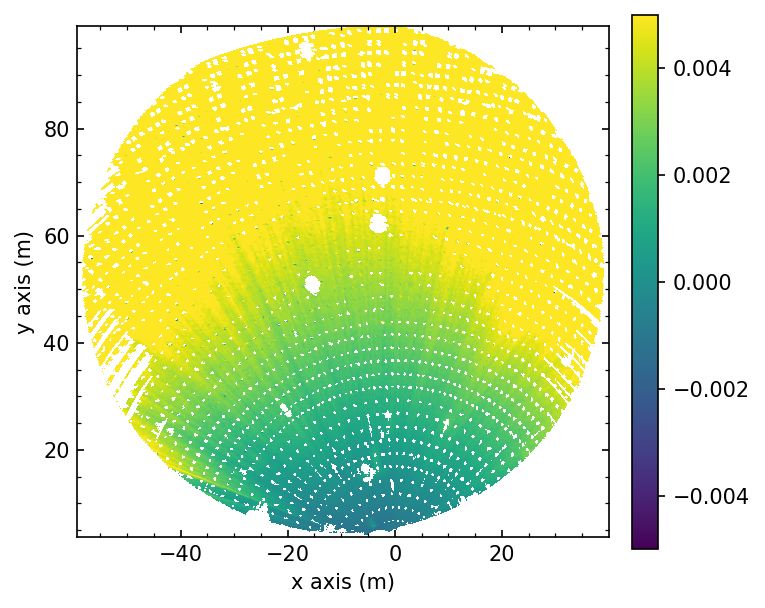

In [18]:
# What are we expecting?
# Based on the active surface fits file.
expected = np.zeros(37)
expected[13] = 594.
# Plot a bar chart with the recovered and expected values.
barChartPlot(np.arange(1,36), np.asarray(fitlist[1:36])*1e6, expected=expected[1:36])
# Show the surface deformation map.
surfacePlot(x, y, diff, vMin=-5e-3, vMax=5e-3)